In [86]:
from PySigmoid import *
from math import *
import numpy as np
import matplotlib.pyplot as plt
import time
from sympy import *

## PySigmoid tutorial

In [7]:
set_posit_env(32, 2)
# float to posit
print(Posit(3.2))
# int to posit
print(Posit(31238912839))
# string to posit
print(Posit("-2.333344"))

# posit to float
print(float(Posit("3.2")))
# posit to int
print(int(Posit(31238912839)))
# posit to string
print(str(Posit("-2.333344")))

a = Posit(1)
b = Posit(2)
# Addition
print(a+b)
# Subtraction
print(a-b)
# Division
print(a/b)
# multiplication
print(a*b)
# square root
print(sqrt(a))
# power
print(a**b)

# operation with other types works too!
print(2.5 + a + 3 + b)

3.20000000298023223876953125
31238914048
-2.33334399759769439697265625
3.2000000029802322
31238914048
-2.33334399759769439697265625
3
-1
0.5
2
1.0
1
8.5


## Sigmoid calculation

In [29]:
sigm = lambda x: 1/(1+np.e**(-x))

In [67]:
_x = np.linspace(-5, 5, 1000)
tic = time.process_time()
for x in _x:
    sigm(x)
toc = time.process_time()
print('Time for usual sigmoid: {}'.format(toc - tic))

set_posit_env(8,0)
tic = time.process_time()
for x in _x:
    (Posit(x).sigmoid())
toc = time.process_time()
print('Time for Posit sigmoid: {}'.format(toc - tic))

Time for usual sigmoid: 0.0
Time for Posit sigmoid: 0.0625


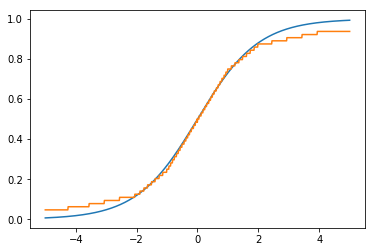

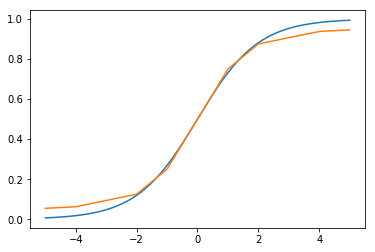

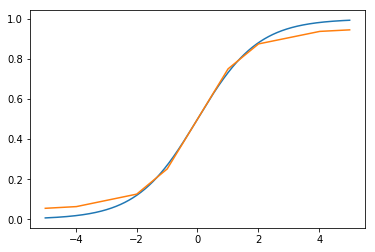

In [42]:
_x = np.linspace(-5, 5, 1000)

set_posit_env(8,0)
y =[]
for x in _x:
    y.append(Posit(x).sigmoid())
plt.figure()
plt.plot(_x, sigm(_x))
plt.plot(_x,y)

set_posit_env(16,0)
y =[]
for x in _x:
    y.append(Posit(x).sigmoid())
plt.figure()
plt.plot(_x, sigm(_x))
plt.plot(_x,y)

set_posit_env(32,0)
y =[]
for x in _x:
    y.append(Posit(x).sigmoid())
plt.figure()
plt.plot(_x, sigm(_x))
plt.plot(_x,y)

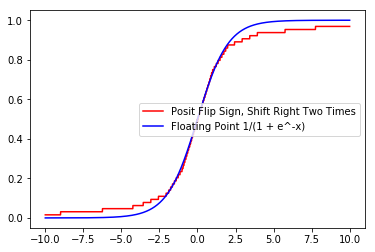

In [130]:
set_posit_env(8, 0)

start = -10
end = 10
xx = []
yy = []
yy2 = []

def sigmoid(x):
    return 1 / (1 + exp(-x))

while start <= end:
    q = Posit(start)
    q = q.sigmoid()
    xx.append(start)
    yy.append(float(q))
    yy2.append(sigmoid(start))
    start += 0.01

# Plot

a = plt.plot(xx, yy, color = 'red', label = "Posit Flip Sign, Shift Right Two Times")
b = plt.plot(xx, yy2, color = 'blue', label = "Floating Point 1/(1 + e^-x)")
plt.legend()

plt.show()

# Newton-Raphson method

In [79]:
def f(x):
    ans = x
    for i in range(1,n):
        ans *= x
    if isinstance(ans, Posit):
        return ans - posit_root
    return ans - float_root

In [73]:
def mul_int(x, n):
    ans = x
    for i in range(1,n):
        ans += x
    return ans

In [74]:
def df(x):
    temp = x
    for i in range(1, n-1):
        temp *= x
    return mul_int(temp, n)

In [75]:
def NewRap(x):
    return x - f(x) / df(x)

In [80]:
def computeNewRap():
    # Value of solution by iteration
    nrp = [posit_x0]*(steps+1)
    nrf = [float_x0]*(steps+1)
    # Error by iteration
    errorp = [posit_x0 - posit_root]*(steps+1)
    errorf = [float_x0 - float_root]*(steps+1)

    for i in range(steps):
        nrp[i+1] = NewRap(nrp[i])
        nrf[i+1] = NewRap(nrf[i])
        errorp[i+1] = nrp[i+1]-posit_root
        errorf[i+1] = nrf[i+1]-float_root

    # Plotting results
    plt.figure(figsize=(10,3))
    plt.subplot(1, 2, 1)
    plt.plot(range(steps+1), errorf)
    plt.title("Error at Newton-Raphson for floats")
    plt.xlabel("Number of steps")
    plt.ylabel("Error")

    plt.subplot(1, 2, 2)
    plt.plot(range(steps+1), errorp)
    plt.title("Error at Newton-Raphson for posits")
    plt.xlabel("Number of steps")
    plt.ylabel("Error")

    plt.show()

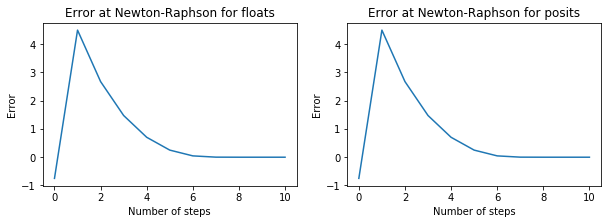

In [81]:
set_posit_env(32, 2)
steps = 10 # amount of steps that are calculated

# initialize value x0 for posits and floats
# here is chosen x0 = 1/4
posit_x0 = Posit(1/4)
float_x0 = np.float32(1/4)

# numbers where the nth root is calculated
# In this case n = 3 and the number from which the root is drawn is 1
n = 3
posit_root = Posit(1)
float_root = np.float32(1)

computeNewRap()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in float_scalars
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in float_scalars
  


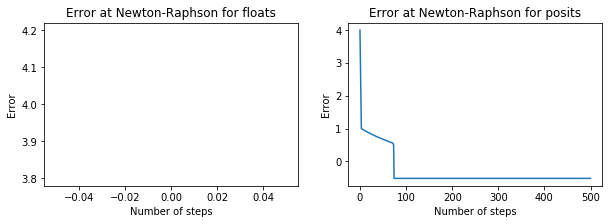

In [85]:
set_posit_env(32, 2)
steps = 500 # amount of steps that are calculated

# initialize value x0 for posits and floats
# here is chosen x0 = 4
posit_x0 = Posit(4)
float_x0 = np.float32(4)

# numbers where the nth root is calculated
# In this case n = 120 and the number from which the root is drawn is 2^(-120)
n = 120
posit_root = Posit(2**(-120))
float_root = np.float32(2**(-120))

# exact answer in a 64 bit float
exact = float(0.5)

computeNewRap()

## Bailey's Numerical Nightmare
(From *The End of Error*)   

Solve the system
$$\begin{pmatrix}
0.25510582 & 0.52746197\\
0.80143857 & 1.65707065
\end{pmatrix}
\begin{pmatrix}
x\\
y
\end{pmatrix}
= 
\begin{pmatrix}
0.79981812\\
2.51270273
\end{pmatrix}$$

In [87]:
a, b, c, d = 25510582/(2**26), 52746197/(2**26), 80143857/(2**26), 165707065/(2**26)
u, v = 79981812/(2**26), 251270273/(2**26)

#### Algebraic solution with `sympy` package

In [88]:
x, y = symbols('x y')
M = Matrix(((a,b,u), (c,d,v)))
system = A, b = M[:, :-1], M[:, -1]
linsolve(system, (x, y))

{(-1.0, 2.0)}

Using Cramer’s rule:

In [92]:
a, b, c, d = 25510582/(2**26), 52746197/(2**26), 80143857/(2**26), 165707065/(2**26)
u, v = 79981812/(2**26), 251270273/(2**26)

In [94]:
fa, fb, fc, fd = np.float64(a), np.float64(b), np.float64(c), np.float64(d)
fu, fv = np.float64(u), np.float64(v)

det = fa*fd - fb*fc;
fx, fy = (fu*fd - fb*fv)/det, (fa*fv - fu*fc)/det
{fx,fy}

{0.0, 2.0}

In [101]:
set_posit_env(59, 3)

pa, pb, pc, pd, pu, pv = a, b, c, d, u, v
# Cramer's rule with Posits
det = pa*pd - pb*pc;
px, py = (pu*pd - pb*pv)/det, (pa*pv - pu*pc)/det
{px, py}

{0.0, 2.0}

## Neural Networks (example from author's GitHub)

In [3]:
from numpy import exp, array, random, dot
import numpy as np
from PySigmoid import *
set_posit_env(8, 0)
from math import *

def posify(x):
    if type(x) == np.ndarray:
        if len(x.shape) == 1:
            return np.array([Posit(y) for y in x])
        else:
            return np.array([[Posit(z) for z in y] for y in x])
    else:
        return Posit(x)

class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1
        self.synaptic_weights = posify(self.synaptic_weights)

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        if type(x) == np.ndarray:
            if len(x.shape) == 1:
                return array([y.sigmoid() for y in x])
            else:
                return array([[z.sigmoid() for z in y] for y in x])
        else:
            return x.sigmoid()

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.

            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))

if __name__ == "__main__":
    neural_network = NeuralNetwork()

    print("Random starting synaptic weights: ")
    print(neural_network.synaptic_weights)

    # The training set. We have 4 examples, each consisting of 3 input values
    # and 1 output value.
    training_set_inputs = posify(array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]]))
    training_set_outputs = posify(array([[0, 1, 1, 0]])).T

    # Train the neural network using a training set.
    # Do it 10,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)

    print("New synaptic weights after training: ")
    print(neural_network.synaptic_weights)

    # Test the neural network with a new situation.
    print("Considering new situation [1, 0, 0] -> ?: ")
    print(neural_network.think(posify(array([1, 0, 0]))))
    print(neural_network.think(posify(array([0, 0, 0]))))
    print(neural_network.think(posify(array([1, 1, 0]))))
    print(neural_network.think(posify(array([0, 1, 0]))))

Random starting synaptic weights: 
[[-0.171875]
 [0.4375]
 [-1]]
New synaptic weights after training: 
[[2.5]
 [-0.015625]
 [-1.15625]]
Considering new situation [1, 0, 0] -> ?: 
[0.890625]
[0.5]
[0.890625]
[0.484375]


In [8]:
from numpy import exp, array, random, dot


class NeuralNetwork():
    def __init__(self):
        # Seed the random number generator, so it generates the same numbers
        # every time the program runs.
        random.seed(1)

        # We model a single neuron, with 3 input connections and 1 output connection.
        # We assign random weights to a 3 x 1 matrix, with values in the range -1 to 1
        # and mean 0.
        self.synaptic_weights = 2 * random.random((3, 1)) - 1

    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
       # print("A", x)
        #print("B", 1 / (1 + exp(-x)))
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)

    # We train the neural network through a process of trial and error.
    # Adjusting the synaptic weights each time.
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        for iteration in range(number_of_training_iterations):
            # Pass the training set through our neural network (a single neuron).
            output = self.think(training_set_inputs)

            # Calculate the error (The difference between the desired output
            # and the predicted output).
            error = training_set_outputs - output

            # Multiply the error by the input and again by the gradient of the Sigmoid curve.
            # This means less confident weights are adjusted more.
            # This means inputs, which are zero, do not cause changes to the weights.
            #print("Z", self.__sigmoid_derivative(output))
            adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
            # Adjust the weights.
            self.synaptic_weights += adjustment

    # The neural network thinks.
    def think(self, inputs):
        # Pass inputs through our neural network (our single neuron).
        return self.__sigmoid(dot(inputs, self.synaptic_weights))

if __name__ == "__main__":

    #Intialise a single neuron neural network.
    neural_network = NeuralNetwork()

    print ("Random starting synaptic weights: ")
    print (neural_network.synaptic_weights)

    # The training set. We have 4 examples, each consisting of 3 input values
    # and 1 output value.
    training_set_inputs = array([[0, 0, 1], [1, 1, 1], [1, 0, 1], [0, 1, 1]])
    training_set_outputs = array([[0, 1, 1, 0]]).T

    # Train the neural network using a training set.
    # Do it 10,000 times and make small adjustments each time.
    neural_network.train(training_set_inputs, training_set_outputs, 10000)

    print ("New synaptic weights after training: ")
    print (neural_network.synaptic_weights)

    # Test the neural network with a new situation.
    print ("Considering new situation [1, 0, 0] -> ?: ")
    
    print(neural_network.think(array([1, 0, 0])))
    print(neural_network.think(array([0, 0, 0])))
    print(neural_network.think(array([1, 1, 0])))
    print(neural_network.think(array([0, 1, 0])))

Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]
New synaptic weights after training: 
[[ 9.67299303]
 [-0.2078435 ]
 [-4.62963669]]
Considering new situation [1, 0, 0] -> ?: 
[0.99993704]
[0.5]
[0.9999225]
[0.44822538]
